# Exercises week 38

## September 15-19

## Resampling and the Bias-Variance Trade-off


### Learning goals

After completing these exercises, you will know how to

- Derive expectation and variances values related to linear regression
- Compute expectation and variances values related to linear regression
- Compute and evaluate the trade-off between bias and variance of a model

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include

- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)


## Use the books!

This week deals with various mean values and variances in linear regression methods (here it may be useful to look up chapter 3, equation (3.8) of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570)).

For more discussions on Ridge regression and calculation of expectation values, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.

The exercises this week are also a part of project 1 and can be reused in the theory part of the project.

### Definitions

We assume that there exists a continuous function $f(\boldsymbol{x})$ and a normal distributed error $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$ which describes our data


$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$


We further assume that this continous function can be modeled with a linear model $\mathbf{\tilde{y}}$ of some features $\mathbf{X}$.


$$
\boldsymbol{y} = \boldsymbol{\tilde{y}} + \boldsymbol{\varepsilon} = \boldsymbol{X}\boldsymbol{\beta} +\boldsymbol{\varepsilon}
$$


We therefore get that our data $\boldsymbol{y}$ has an expectation value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$, that is $\boldsymbol{y}$ follows a normal distribution with mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$.


## Exercise 1: Expectation values for ordinary least squares expressions


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ show that


$$
\mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) = \boldsymbol{\beta}.
$$


Proof.

Writing it all out using the equation for $\beta$ and $y$ we get:

\begin{align*}
\mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) &= \mathbb{E}[(X^T X)^{-1} X^T y] \\
&=\mathbb{E}[(X^T X)^{-1} X^T (X \beta + \varepsilon)] \\
&\text{Matrix distribution from the left side,} \\
&= \mathbb{E} [(X^T X)^{-1} X^T X \beta + (X^T X)^{-1} X^T \varepsilon] \\
&\text{distribution over addition for the expectation operator,} \\
&= \mathbb{E} [(X^T X)^{-1} X^T X \beta] + \mathbb{E}[(X^T X)^{-1} X^T \varepsilon]\\
&\text{pulling the constant $X$ outside of the expectation operator,} \\
&= \mathbb{E} [\mathbb{1} * \beta] + (X^T X)^{-1} X^T \mathbb{E}[\varepsilon]\\
&\text{by assumption $\mathbb{E}[\varepsilon] = 0$,}\\
&= \mathbb{E} [\beta] + (X^T X)^{-1} X^T * 0 \\
&\text{and we have our result from $\beta$ being a constant} \\
&= \beta
\end{align*}


- - -

**b)** Show that the variance of $\boldsymbol{\hat{\beta}_{OLS}}$ is


$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1}.
$$


We can use the last expression when we define a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the parameters $\boldsymbol{\hat{\beta}_{OLS}}$.
A given parameter ${\boldsymbol{\hat{\beta}_{OLS}}}_j$ is given by the diagonal matrix element of the above matrix.


Proof.

\begin{align*}
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) &= \mathbf{Var} [\beta + (X^T X)^{-1} X^T \varepsilon] \\
&\text{by distribution of $\mathbf{Var}$ over addition and that $\mathbf{Var}[\beta] = 0$,} \\
&= \mathbf{Var}[(X^T X)^{-1} X^T \varepsilon] \\
& \text{Writing it out gives,} \\
&= \mathbb{E} [ ((X^T X)^{-1} X^T \varepsilon - \mathbb{E}[(X^T X)^{-1} X^T \varepsilon])*((X^T X)^{-1} X^T \varepsilon - \mathbb{E}[(X^T X)^{-1} X^T \varepsilon])^T] \\
& \text{Since the expectation Value is 0 for the inner E's using the argument from 1a,} \\
&=\mathbb{E} [ ((X^T X)^{-1} X^T \varepsilon) ((X^T X)^{-1} X^T \varepsilon)^T ]\\
& \text{Taking the transpose gives} \\
&=\mathbb{E} [ (X^T X)^{-1} X^T (\varepsilon \varepsilon^T) X (X^T X)^{(-1)}]\\
& \text{Moving the expectation operation inside we get}\\
&= (X^T X)^{-1} X^T \mathbb{E} [\varepsilon \varepsilon^T] X (X^T X)^{(-1)}\\
& \text{since $\mathbb{E}[\varepsilon \varepsilon^T] = \sigma^2 * \mathbf{1}$ }\\
&=(X^T X)^{-1} X^T \sigma^2 X (X^T X)^{(-1)}\\
&\text{Then moving the $\sigma^2$ around and simplifying we get the result}\\
&=\sigma^2 (X^T X)^{-1}
\end{align*}


- - -

## Exercise 2: Expectation values for Ridge regression


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{Ridge}}$ show that


$$
\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}
$$


We see that $\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big] \not= \mathbb{E} \big[\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}\big ]$ for any $\lambda > 0$.


Proof.

\begin{align*}
\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}] &= \mathbb{E}[(X^T X+\lambda \boldsymbol{I})^{-1} X^T (X \beta + \varepsilon)] \\
&\text{Same arguments as in 1. on X and +,} \\
&= (X^T X+\lambda\boldsymbol{I})^{-1} X^T (X \mathbb{E}[\beta] + \mathbb{E}[\varepsilon]) \\
&\text{using $\mathbb{E}[\varepsilon] = 0$ and $\mathbb{E}[\beta] = \beta$, then simplifying we get the result} \\
&= (X^T X+\lambda\boldsymbol{I})^{-1} (X^T X) \beta
\end{align*}
- - -

**b)** Show that the variance is


$$
\mathbf{Var}[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T}\mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}
$$


We see that if the parameter $\lambda$ goes to infinity then the variance of the Ridge parameters $\boldsymbol{\beta}$ goes to zero.


Proof.

\begin{align*}
\mathbf{Var}[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}] =&  \mathbf{Var}[(X^T X+\lambda \boldsymbol{I})^{-1} X^T (X \beta + \varepsilon)] \\
&\text{Writing out the variance}\\
&= \mathbb{E} [ ((X^T X+\lambda \boldsymbol{I})^{-1} X^T (X \beta + \varepsilon) - \mathbb{E}[(X^T X+\lambda \boldsymbol{I})^{-1} X^T (X \beta + \varepsilon)])*((X^T X+\lambda \boldsymbol{I})^{-1} X^T (X \beta + \varepsilon) - \mathbb{E}[(X^T X+\lambda \boldsymbol{I})^{-1} X^T (X \beta + \varepsilon)])^T] \\
& \text{Expectation of $\mathbb{E}[\varepsilon]=0$ and summing gives a $\pm$-term for $\beta$ resulting in}\\
&= \mathbb{E} [ ((X^T X+\lambda \boldsymbol{I})^{-1} X^T \varepsilon )*((X^T X+\lambda \boldsymbol{I})^{-1} X^T \varepsilon)^T]  \\
&\text{Doing the transpose and dragging $\mathbb{E}$ in results in the same $\sigma^2$-term as in 1b and we get the result } \\
&= \sigma^2 (X^T X+\lambda \boldsymbol{I})^{-1} X^T X \{(X^T X + \lambda \boldsymbol{I})^{-1}\}^T
\end{align*}
- - -

## Exercise 3: Deriving the expression for the Bias-Variance Trade-off


The aim of this exercise is to derive the equations for the bias-variance tradeoff to be used in project 1.

The parameters $\boldsymbol{\hat{\beta}_{OLS}}$ are found by optimizing the mean squared error via the so-called cost function


$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]
$$


**a)** Show that you can rewrite this into an expression which contains

- the variance of the model (the variance term)
- the expected deviation of the mean of the model from the true data (the bias term)
- the variance of the noise

In other words, show that:


$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$


with


$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$


and


$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

In order to arrive at the equation for the bias, we have to approximate the unknown function $f$ with the output/target values $y$.

Proof.

First write out what the terms are for the expectation value of $\mathbb{E}[(y-\tilde{y})^2]$:

\begin{align*}
\mathbb{E}[(y-\tilde{y})^2 ]&= \mathbb{E}[(y-\tilde{y}) (y-\tilde{y}) ] \\
&= \mathbb{E}[(y^2-\tilde{y} y -y \tilde{y} +\tilde{y}^2)] \\
&= \mathbb{E}[y^2] - 2 \mathbb{E}[\tilde{y} y] +\mathbb{E}[\tilde{y}^2] \\
\end{align*}

First, looking into the function $\mathbb{E}[\tilde{y}^2]$ and using $\mathrm{var}[\tilde{y}] = \mathbb{E}[y^2] - \mu_y^2$ we see that this can be written as 
$$
\mathbb{E}[\tilde{y}^2] = \mathrm{var}[\tilde{y}] + \mathbb{E}[\tilde{y}]^2.
$$

Secondly looking closer at $\mathbb{E}[y^2]$ and writing the function $y$ as $f + \varepsilon$, where we assuming $f$ to be non stochastic and $\varepsilon \sim N(0, \sigma^2)$, we get:

$$
\mathbb{E}[(f+\varepsilon)^2] = \mathbb{E}[f^2] + 2 \mathbb{E}[f]\mathbb{E}[\varepsilon] + \mathbb{E}[\varepsilon^2] = \mathbb{E}[f^2] + \sigma^2 = f^2 + \sigma^2
$$

Lastly the term $\mathbb{E}[\tilde{y} y]$, becomes the following since $\tilde{y}$ and $\varepsilon$ are independent so we can distribute the expectation operation.

$$
\mathbb{E}[\tilde{y} (f + \varepsilon)] = \mathbb{E}[\tilde{y} f] + \mathbb{E}[\tilde{y} \varepsilon] = f \mathbb{E}[\tilde{y}] + 0
$$

Taking everything together we get:

\begin{align*}
&=\mathbb{E}[y^2] - 2 \mathbb{E}[\tilde{y} y] +\mathbb{E}[\tilde{y}^2] \\
&= f^2 + \sigma^2 - 2 f \mathbb{E}[\tilde{y}] +\mathrm{var}[\tilde{y}] + \mathbb{E}[\tilde{y}]^2 \\
&= f^2 - 2 f \mathbb{E}[\tilde{y}] + \mathbb{E}[\tilde{y}]^2 + \mathrm{var}[\tilde{y}] + \sigma^2 \\
&= \mathbb{E}[ (f - \mathbb{E}[\tilde{y}])^2] + \mathrm{var}[\tilde{y}] + \sigma^2 \\
&= \mathrm{bias}[\tilde{y}]  + \mathrm{var}[\tilde{y}] + \sigma^2 \
\end{align*}

Where we have approximated $f$ with $y$, in the last step.
- - -


**b)** Explain what the terms mean and discuss their interpretations.


Bias, which is similar to aiming, is where the predictions will clutter around compared to where it should clutter around. So if the bias is near 0 then the mean prediction will be spot on where the predictions should be.
\\

Variance, is how spread out or condensed the predictions are around the bias. Large variance would be equivalent to using a shotgun on a target, low variance would be like using a rifle.
\\

While $\sigma$ is the natural distribution of the true values based on a noisy environment.

- - - 

## Exercise 4: Computing the Bias and Variance


Before you compute the bias and variance of a real model for different complexities, let's for now assume that you have sampled predictions and targets for a single model complexity using bootstrap resampling.

**a)** Using the expression above, compute the mean squared error, bias and variance of the given data. Check that the sum of the bias and variance correctly gives (approximately) the mean squared error.


In [1]:
import numpy as np

n = 100
bootstraps = 1000

predictions = np.random.rand(bootstraps, n) * 10 + 10
# The definition of targets has been updated, and was wrong earlier in the week.
targets = np.random.rand(1, n)

mse = np.mean((predictions - targets) ** 2)
bias = (np.mean(predictions) - np.mean(targets)) ** 2
variance = np.var(predictions)

In [2]:
print(f"MSE: {mse}, and the sum of the bias + variance gives: {bias + variance} with bias: {bias} and variance: {variance}")

MSE: 218.64405031627618, and the sum of the bias + variance gives: 218.5481665097476 with bias: 210.25540113667188 and variance: 8.292765373075712


**b)** Change the prediction values in some way to increase the bias while decreasing the variance.

**c)** Change the prediction values in some way to increase the variance while decreasing the bias.


In [3]:
predictions = np.random.rand(bootstraps, n) * 10 - 30
mse = np.mean((predictions - targets) ** 2)
bias = (np.mean(predictions) - np.mean(targets)) ** 2
variance = np.var(predictions)

print("B)")
print("After Changing the target for the predictions we have:")
print(f"MSE: {mse}, and the sum of the bias + variance gives: {bias + variance} with bias: {bias} and variance: {variance}\n")


predictions = np.random.rand(bootstraps, n) * 50 + 10
mse = np.mean((predictions - targets) ** 2)
bias = (np.mean(predictions) - np.mean(targets)) ** 2
variance = np.var(predictions)

print("C)")
print("After changing the variance for the predictions we have:")
print(f"MSE: {mse}, and the sum of the bias + variance gives: {bias + variance} with bias: {bias} and variance: {variance}")

B)
After Changing the target for the predictions we have:
MSE: 658.006329884716, and the sum of the bias + variance gives: 657.9147802291905 with bias: 649.5689394500463 and variance: 8.345840779144202

C)
After changing the variance for the predictions we have:
MSE: 1392.5018578180388, and the sum of the bias + variance gives: 1392.4589444209805 with bias: 1184.172829919193 and variance: 208.28611450178744


**d)** Perform a bias-variance analysis of a polynomial OLS model fit to a one-dimensional function by computing and plotting the bias and variances values as a function of the polynomial degree of your model.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

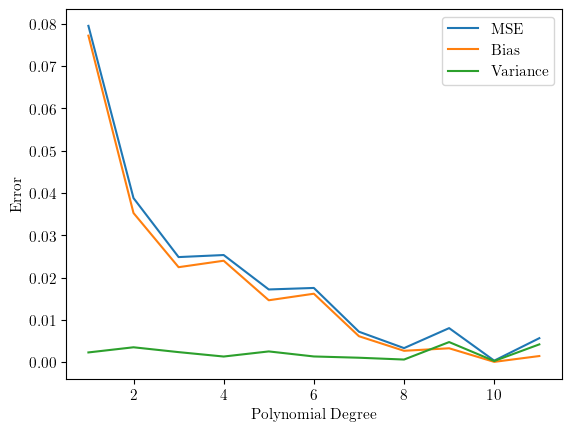

In [16]:
n = 100
bootstraps = 1000

polynomials = 12

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"], # This matches LaTeX's default font
    "font.size": 11,                       # This matches the 11pt in \documentclass
})


x = np.linspace(-3, 3, n)
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1)

biases = []
variances = []
mses = []

for p in range(1, polynomials):
    X = PolynomialFeatures(degree=p).fit_transform(x.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    predictions = np.zeros((bootstraps, len(y_test)))
    targets = np.zeros((bootstraps, len(y_test)))
    for b in range(bootstraps):
       X_train_re, y_train_re = resample(X_train, y_train)
       model = LinearRegression().fit(X_train_re, y_train_re)
       # make predictions on the test data
       predictions[b, :] = model.predict(X_test)
       targets[b, :] = y_test
    biases.append((np.mean(predictions, axis=0) - np.mean(targets, axis=0)) ** 2)
    variances.append(np.var(predictions, axis=0))
    mses.append(mean_squared_error(predictions, targets))

plt.plot(range(1, polynomials), mses, label="MSE")
plt.plot(range(1, polynomials), np.mean(biases, axis=1), label="Bias")
plt.plot(range(1, polynomials), np.mean(variances, axis=1), label="Variance")
plt.xlabel("Polynomial Degree")
plt.ylabel("Error")
plt.legend()
plt.savefig('bias_variance_tradeoff.pdf', format='pdf', bbox_inches='tight')
plt.show()

**e)** Discuss the bias-variance trade-off as function of your model complexity (the degree of the polynomial).

The variance seems to stay steady at a low rate for all the different polynomial degrees, while the bias improves when the degree of the polynomial increases. This is then reflected in the models ability to predict which we can see by looking at the MSE. And if we increase the degrees further we should see that the model will overfit to the training data and might extract a bias from that overfitting. 


- - -

**f)** Compute and discuss the bias and variance as function of the number of data points (choose a suitable polynomial degree to show something interesting).


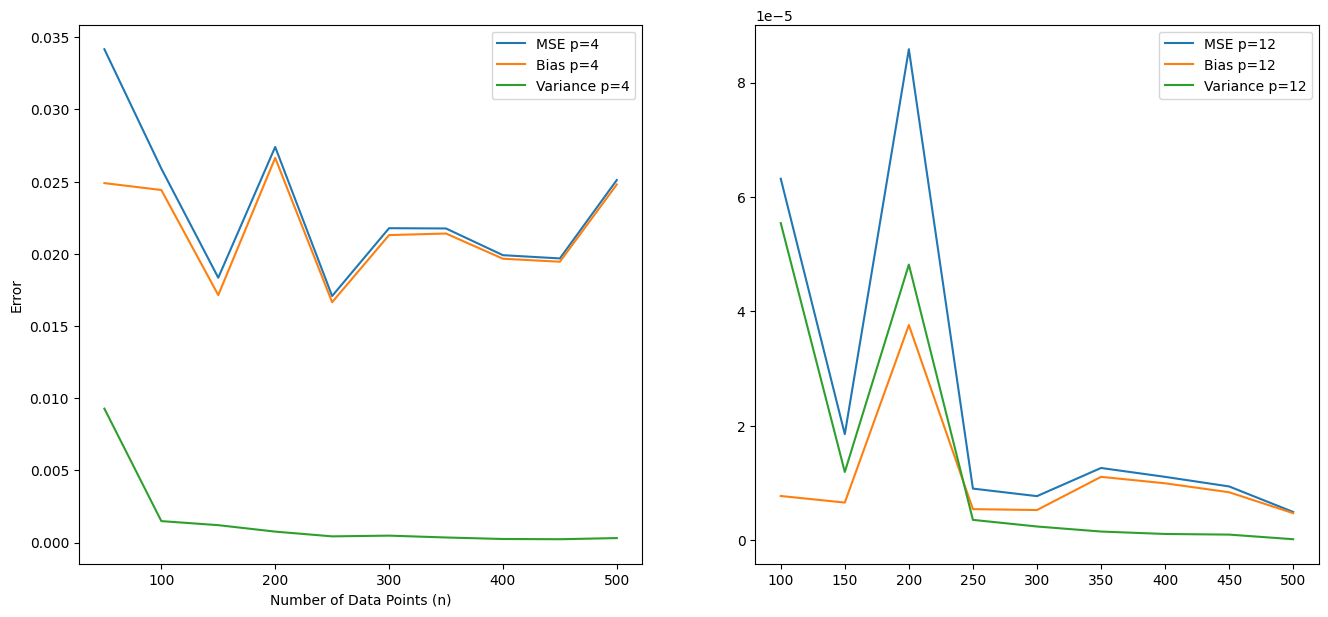

In [6]:
np.random.seed(2018)
bootstraps = 100
datapoints = np.arange(50, 501, 50)
p = 12



biases = []
variances = []
mses = []

for p in [4, 12]:
    for n in datapoints:
        x = np.linspace(-3, 3, n)
        y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1)
        X = PolynomialFeatures(degree=p).fit_transform(x.reshape(-1, 1))
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        predictions = np.zeros((bootstraps, len(y_test)))
        targets = np.zeros((bootstraps, len(y_test)))
        for b in range(bootstraps):
           X_train_re, y_train_re = resample(X_train, y_train)
           model = LinearRegression().fit(X_train_re, y_train_re)
           # make predictions on the test data
           predictions[b, :] = model.predict(X_test)
           targets[b, :] = y_test
        biases.append(np.mean((np.mean(predictions, axis=0) - np.mean(targets, axis=0)) ** 2))
        variances.append(np.mean(np.var(predictions, axis=0)))
        mses.append(mean_squared_error(predictions, targets))

indeks = len(datapoints) 

fig, axes = plt.subplots(1, 2, figsize=(16, 7))


axes[0].plot(datapoints, mses[:indeks], label="MSE p=4")
axes[0].plot(datapoints, biases[:indeks], label="Bias p=4")
axes[0].plot(datapoints, variances[:indeks], label="Variance p=4")
axes[0].legend()

axes[1].plot(datapoints[1:], mses[indeks +1:], label="MSE p=12")
axes[1].plot(datapoints[1:], biases[indeks+1:], label="Bias p=12")
axes[1].plot(datapoints[1:], variances[indeks+1:], label="Variance p=12")

axes[0].set_xlabel("Number of Data Points (n)")
axes[0].set_ylabel("Error")
axes[1].legend()
plt.show()

When we look at the plot where the model is of degree 4, we see that the gap between Bias doesn't seem to improve as we throw more points at it. 
While the variance slowly plateaus at the bottom. Indicating a model that is to simple to learn the shape of the function.

While the graph to the right where the model is much more complex, start with having higher variance than bias before it turns around and the variance seems to plateau again and the bias continues to have more dynamics within except that the error in total is now much smaller.

## Exercise 5: Interpretation of scaling and metrics


In this course, we often ask you to scale data and compute various metrics. Although these practices are "standard" in the field, we will require you to demonstrate an understanding of _why_ you need to scale data and use these metrics. Both so that you can make better arguements about your results, and so that you will hopefully make fewer mistakes.

First, a few reminders: In this course you should always scale the columns of the feature matrix, and sometimes scale the target data, when it is worth the effort. By scaling, we mean subtracting the mean and dividing by the standard deviation, though there are many other ways to scale data. When scaling either the feature matrix or the target data, the intercept becomes a bit harder to implement and understand, so take care.

Briefly answer the following:

**a)** Why do we scale data?

So that each variable will have equal sway in the training.

**b)** Why does the OLS method give practically equivelent models on scaled and unscaled data?

Because it has an analytical solution to find the minimum.

**c)** Why does the Ridge method **not** give practically equivelent models on scaled and unscaled data? Why do we only consider the model on scaled data correct?

This model is also based on an extra penalization term in the loss function which is not invariant to scaling.
Therefore if the variables are not scaled some might have larger influence than others.

**d)** Why do we say that the Ridge method gives a biased model?

Since the extra penalization term causes the models coefficients to shrink towards 0, this is by design to make it better on new data. 


**e)** Is the MSE of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

No for the feature matrix as the predicted values will still be of the same magnitude, but yes for the target data as the difference will be scaled up or down by this.


**f)** Read about the R2 score, a metric we will ask you to use a lot later in the course. Is the R2 score of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

In contrast to MSE, R2 will not be changed by scaling either the feature matrix or the target matrix, making this metric more interpretable than MSE.


**g)** Give interpretations of the following R2 scores: 0, 0.5, 1.

0 -> the models cannot explain anything of the variance in the model, as good as just taking the same target average each time.

0.5 -> It explains 50% of the variance

1 -> It explains all the variance of the model, it makes perfect predictions on the data

**h)** What is an advantage of the R2 score over the MSE?

It is much more interpretable than MSE .

